# Importing the Data and libraries needed

In [34]:
#point 2 - analyze run times in relation to revenue

In [29]:
#Importing libraries that will be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3

In [35]:
#Importing movie budgets and previewing data
df_gross = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
def clean_dollar(df, column):
    df[column] = df[column].str.strip('$')
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype(int)
    return df[column]

In [37]:
clean_dollar(df_gross,'domestic_gross')
df_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"


In [39]:
gross = df_gross.iloc[:, [2, 4]]
gross

,movie,domestic_gross
0,Avatar,760507625
1,Pirates of the Caribbean: On Stranger Tides,241063875
2,Dark Phoenix,42762350
3,Avengers: Age of Ultron,459005868
4,Star Wars Ep. VIII: The Last Jedi,620181382
...,...,...
5777,Red 11,0
5778,Following,48482
5779,Return to the Land of Wonders,1338
5780,A Plague So Pleasant,0


In [69]:
gross['domestic_gross'].mean()

41873326.867001034

In [3]:
#looking for missing data, rows and column information
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
con = sqlite3.connect('../../zippedData/im.db')

runtime = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [79]:
runtime = pd.read_sql("""
SELECT runtime_minutes
FROM movie_basics
WHERE runtime_minutes is not null and runtime_minutes < 300
""", con)
run = runtime.astype(int)
run.describe()

,runtime_minutes
count,114273.000000
mean,84.737663
std,28.152987
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,296.000000


In [6]:
run.describe()

,runtime_minutes
count,114273.000000
mean,84.737663
std,28.152987
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,296.000000


<AxesSubplot:title={'center':'runtime minutes'}>

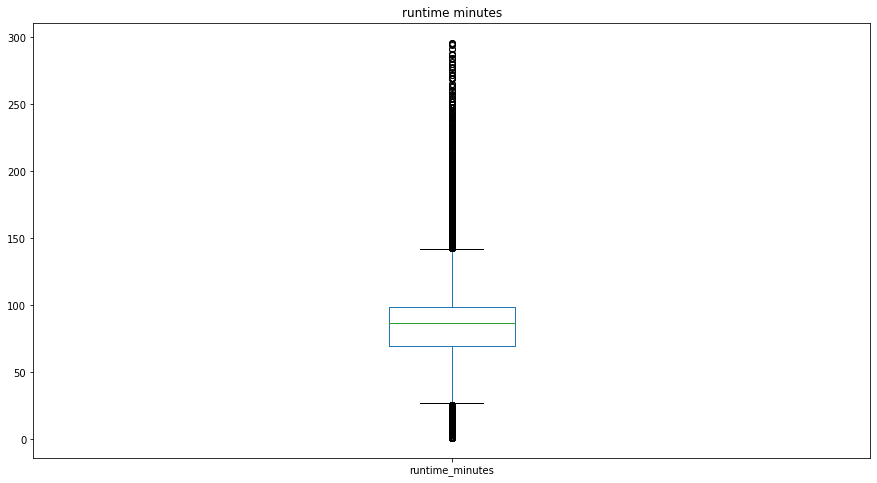

In [73]:
run.plot(kind='box', title='runtime minutes', figsize=(15,8))

In [41]:
gross.to_sql("movie_gross", con, if_exists="replace")

In [89]:
filtered_gross = pd.read_sql("""
SELECT DISTINCT domestic_gross, runtime_minutes
FROM movie_gross
LEFT JOIN movie_basics
ON movie_gross.movie = movie_basics.primary_title
WHERE runtime_minutes is not null and runtime_minutes BETWEEN 30 AND 300 AND domestic_gross > 40000000
ORDER BY runtime_minutes DESC
LIMIT 1000
""", con).drop_duplicates()
filtered_gross.astype(int)
#filtering out movies that made less than the average gross of 40 million and had runtimes greater than the average

,domestic_gross,runtime_minutes
0,116900694,180
1,100920329,172
2,188017894,169
3,303003568,169
4,54117416,168
...,...,...
952,54730625,46
953,126573960,40
954,177397510,35
955,43787265,32


<AxesSubplot:xlabel='runtime_minutes', ylabel='domestic_gross'>

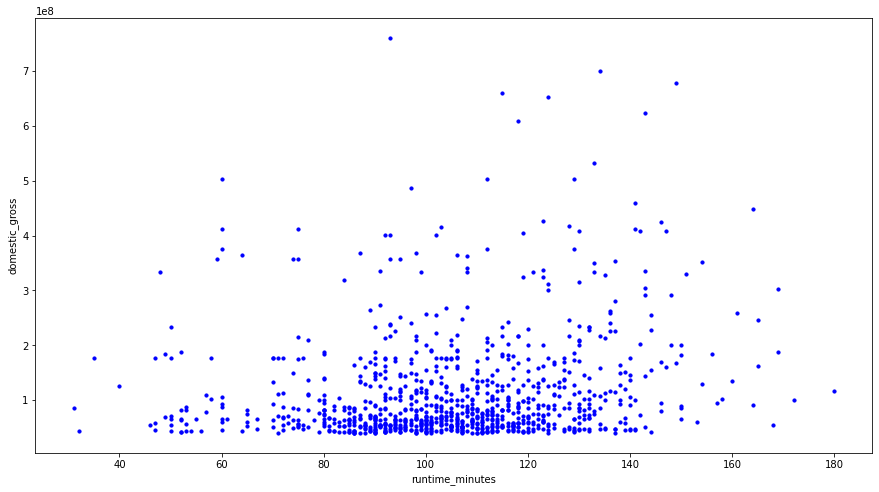

In [97]:
filtered_gross.plot.scatter(x = 'runtime_minutes',y= 'domestic_gross',s = 10, c = 'blue', figsize=(15,8))